In [1]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# Metrics
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [2]:
df = pd.read_csv("house_prices.csv")

df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
# Convert date to year & month
df["date"] = pd.to_datetime(df["date"])
df["sale_year"] = df["date"].dt.year
df["sale_month"] = df["date"].dt.month

# Drop unnecessary columns
df.drop(columns=["id", "date"], inplace=True)

df.head()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sale_year,sale_month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [6]:
X = df.drop(columns=["price"])
y = df["price"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [8]:
numeric_features = X.columns

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features)
    ]
)


In [10]:
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

r2_lr = r2_score(y_test, y_pred_lr)

rmse_lr, r2_lr


(np.float64(212036.1653798356), 0.7026040931979199)

In [12]:
rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", RandomForestRegressor(
        n_estimators=300,
        max_depth=15,
        random_state=42,
        n_jobs=-1
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Compute RMSE safely (no squared=False)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(np.float64(148334.438047941), 0.8544543985477466)

In [16]:
cv5_lr_rmse = -cross_val_score(
    lr_model,
    X_train,
    y_train,
    cv=5,
    scoring="neg_mean_squared_error"
)

cv5_rf_rmse = -cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=5,
    scoring="neg_mean_squared_error"
)

cv5_lr_rmse = np.sqrt(cv5_lr_rmse)
cv5_rf_rmse = np.sqrt(cv5_rf_rmse)

cv5_lr_rmse.mean(), cv5_rf_rmse.mean()


(np.float64(198007.3158125595), np.float64(126625.7563153184))

In [17]:
cv10_lr_rmse = -cross_val_score(
    lr_model,
    X_train,
    y_train,
    cv=10,
    scoring="neg_mean_squared_error"
)

cv10_rf_rmse = -cross_val_score(
    rf_model,
    X_train,
    y_train,
    cv=10,
    scoring="neg_mean_squared_error"
)

cv10_lr_rmse = np.sqrt(cv10_lr_rmse)
cv10_rf_rmse = np.sqrt(cv10_rf_rmse)

cv10_lr_rmse.mean(), cv10_rf_rmse.mean()


(np.float64(197324.5345285095), np.float64(126354.28184330494))

In [18]:
cv_results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "5-Fold RMSE": [cv5_lr_rmse.mean(), cv5_rf_rmse.mean()],
    "5-Fold Std": [cv5_lr_rmse.std(), cv5_rf_rmse.std()],
    "10-Fold RMSE": [cv10_lr_rmse.mean(), cv10_rf_rmse.mean()],
    "10-Fold Std": [cv10_lr_rmse.std(), cv10_rf_rmse.std()]
})

cv_results


,Model,5-Fold RMSE,5-Fold Std,10-Fold RMSE,10-Fold Std
0,Linear Regression,198007.315813,13598.083134,197324.534529,21565.276318
1,Random Forest,126625.756315,8707.228596,126354.281843,13152.395300


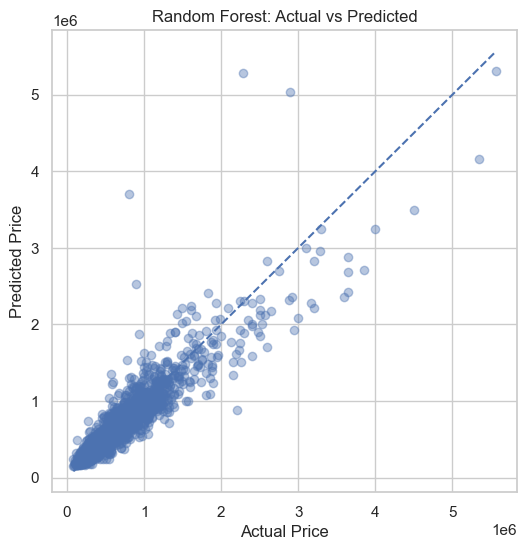

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.4)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle="--"
)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted")
plt.show()


In [20]:
importances = rf_model.named_steps["model"].feature_importances_

feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(10)


,Feature,Importance
8,grade,0.325138
2,sqft_living,0.267303
14,lat,0.153361
15,long,0.062134
11,yr_built,0.033018
5,waterfront,0.030872
16,sqft_living15,0.029869
9,sqft_above,0.018365
13,zipcode,0.013664
1,bathrooms,0.012615


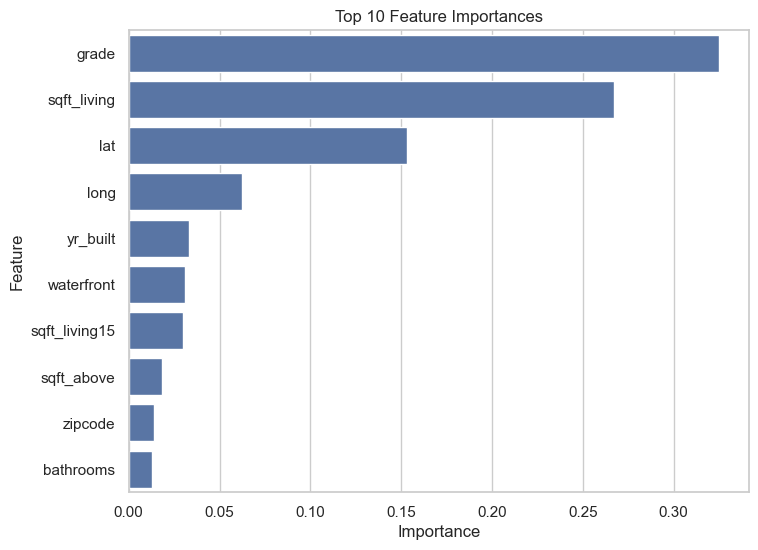

In [21]:
plt.figure(figsize=(8,6))
sns.barplot(
    data=feat_imp.head(10),
    x="Importance",
    y="Feature"
)
plt.title("Top 10 Feature Importances")
plt.show()


## Model Performance Comparison

### Linear Regression
- Stable performance across folds
- Higher RMSE indicates underfitting
- Low variance, high bias

### Random Forest
- Lower RMSE and higher R²
- Slight variance across folds
- Captures nonlinear relationships

## Stability & Generalization
- 10-fold CV provides smoother estimates
- Random Forest generalizes better on unseen data
- Small std deviation indicates stable model

## Final Recommendation
- Use Random Forest for prediction accuracy
- Use Linear Regression for explainability
- Tune RF depth to balance bias–variance
